In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.utils import to_categorical

In [9]:
# Load dataset
df = pd.read_csv("C:\\Users\\prana\\OneDrive\\Desktop\\winequality-white.csv")

# Splitting the data into features and target
X = df.drop('quality', axis=1)
y = df['quality']


In [10]:
# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Random Forest model
rf = RandomForestClassifier(n_estimators=450, max_depth=25, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_predictions = rf.predict(X_test_scaled)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           3       0.98      1.00      0.99       431
           4       0.93      0.97      0.95       460
           5       0.82      0.79      0.80       439
           6       0.73      0.64      0.68       447
           7       0.82      0.87      0.85       451
           8       0.94      0.98      0.96       410

    accuracy                           0.87      2638
   macro avg       0.87      0.87      0.87      2638
weighted avg       0.87      0.87      0.87      2638

Random Forest Confusion Matrix:
[[431   0   0   0   0   0]
 [  1 445   9   4   1   0]
 [  2  21 346  59   9   2]
 [  3   9  65 287  70  13]
 [  1   3   1  41 394  11]
 [  0   1   0   2   6 401]]


In [12]:
# SVM model
svm_model = SVC(kernel='rbf',C=1000, random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           3       0.99      1.00      0.99       431
           4       0.89      0.96      0.93       460
           5       0.73      0.76      0.74       439
           6       0.68      0.56      0.61       447
           7       0.82      0.83      0.82       451
           8       0.93      0.98      0.95       410

    accuracy                           0.85      2638
   macro avg       0.84      0.85      0.84      2638
weighted avg       0.84      0.85      0.84      2638

SVM Confusion Matrix:
[[431   0   0   0   0   0]
 [  1 443  13   2   1   0]
 [  1  31 333  64   9   1]
 [  3  21  97 249  66  11]
 [  0   1  13  47 374  16]
 [  0   0   0   4   6 400]]


In [13]:
# Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=1000, random_state=42)
gb.fit(X_train_scaled, y_train)
gb_predictions = gb.predict(X_test_scaled)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_predictions))
print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, gb_predictions))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           3       0.98      1.00      0.99       431
           4       0.93      0.94      0.94       460
           5       0.77      0.72      0.75       439
           6       0.67      0.70      0.69       447
           7       0.80      0.76      0.78       451
           8       0.90      0.93      0.92       410

    accuracy                           0.84      2638
   macro avg       0.84      0.84      0.84      2638
weighted avg       0.84      0.84      0.84      2638

Gradient Boosting Confusion Matrix:
[[431   0   0   0   0   0]
 [  1 434  13   7   5   0]
 [  4  20 317  89   8   1]
 [  1   8  62 315  54   7]
 [  3   3  17  54 342  32]
 [  0   1   1   7  21 380]]


In [14]:
# ANN model
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
ann = Sequential([
    Dense(128, activation='relu', input_shape=(11,)),
    Dense(64, activation='relu'),
    Dense(np.max(y)+1, activation='softmax')
])
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train_scaled, y_train_cat, epochs=1000, batch_size=32)
ann_predictions = np.argmax(ann.predict(X_test_scaled), axis=1)
print("ANN Classification Report:")
print(classification_report(y_test, ann_predictions))
print("ANN Confusion Matrix:")
print(confusion_matrix(y_test, ann_predictions))

Epoch 1/1000
330/330 [==============================] - 1s 2ms/step - loss: 1.3092 - accuracy: 0.4799
Epoch 2/1000
330/330 [==============================] - 1s 2ms/step - loss: 1.0305 - accuracy: 0.5811
Epoch 3/1000
330/330 [==============================] - 1s 2ms/step - loss: 0.9413 - accuracy: 0.6189
Epoch 4/1000
330/330 [==============================] - 1s 2ms/step - loss: 0.8836 - accuracy: 0.6410
Epoch 5/1000
330/330 [==============================] - 0s 1ms/step - loss: 0.8387 - accuracy: 0.6573
Epoch 6/1000
330/330 [==============================] - 0s 2ms/step - loss: 0.8023 - accuracy: 0.6759
Epoch 7/1000
330/330 [==============================] - 0s 1ms/step - loss: 0.7724 - accuracy: 0.6881
Epoch 8/1000
330/330 [==============================] - 1s 2ms/step - loss: 0.7409 - accuracy: 0.7032
Epoch 9/1000
330/330 [==============================] - 1s 2ms/step - loss: 0.7168 - accuracy: 0.7145
Epoch 10/1000
330/330 [==============================] - 1s 2ms/step - loss: 0.691

In [15]:
# CNN model (Adjusting input shape for 1D convolutions)
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
cnn = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(11,1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(np.max(y)+1, activation='softmax')
])
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train_cat, epochs=1000, batch_size=32)
cnn_predictions = np.argmax(cnn.predict(X_test_cnn), axis=1)
print("CNN Classification Report:")
print(classification_report(y_test, cnn_predictions))
print("CNN Confusion Matrix:")
print(confusion_matrix(y_test, cnn_predictions))

Epoch 1/1000
330/330 [==============================] - 1s 3ms/step - loss: 1.3098 - accuracy: 0.4668
Epoch 2/1000
330/330 [==============================] - 1s 3ms/step - loss: 1.0448 - accuracy: 0.5700
Epoch 3/1000
330/330 [==============================] - 1s 3ms/step - loss: 0.9650 - accuracy: 0.6104
Epoch 4/1000
330/330 [==============================] - 1s 3ms/step - loss: 0.9100 - accuracy: 0.6316
Epoch 5/1000
330/330 [==============================] - 1s 3ms/step - loss: 0.8697 - accuracy: 0.6489
Epoch 6/1000
330/330 [==============================] - 1s 3ms/step - loss: 0.8383 - accuracy: 0.6560
Epoch 7/1000
330/330 [==============================] - 1s 3ms/step - loss: 0.8034 - accuracy: 0.6676
Epoch 8/1000
330/330 [==============================] - 1s 3ms/step - loss: 0.7763 - accuracy: 0.6846
Epoch 9/1000
330/330 [==============================] - 1s 3ms/step - loss: 0.7540 - accuracy: 0.6908
Epoch 10/1000
330/330 [==============================] - 1s 3ms/step - loss: 0.735

In [16]:
# Build MLP Model
mlp_model = Sequential([
    Dense(256, activation='relu', input_shape=(11,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(np.max(y)+1, activation='softmax')
])

mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train_scaled, y_train_cat, epochs=500, batch_size=32)

# Predictions
mlp_predictions = np.argmax(mlp_model.predict(X_test_scaled), axis=1)
print("MLP Classification Report:")
print(classification_report(y_test, mlp_predictions))
print("MLP Confusion Matrix:")
print(confusion_matrix(y_test, mlp_predictions))

Epoch 1/500
330/330 [==============================] - 1s 2ms/step - loss: 1.1495 - accuracy: 0.5294
Epoch 2/500
330/330 [==============================] - 1s 3ms/step - loss: 0.8894 - accuracy: 0.6285
Epoch 3/500
330/330 [==============================] - 1s 3ms/step - loss: 0.7887 - accuracy: 0.6714
Epoch 4/500
330/330 [==============================] - 1s 3ms/step - loss: 0.7248 - accuracy: 0.7019
Epoch 5/500
330/330 [==============================] - 1s 3ms/step - loss: 0.6543 - accuracy: 0.7319
Epoch 6/500
330/330 [==============================] - 1s 3ms/step - loss: 0.6081 - accuracy: 0.7492
Epoch 7/500
330/330 [==============================] - 1s 3ms/step - loss: 0.5615 - accuracy: 0.7753
Epoch 8/500
330/330 [==============================] - 1s 3ms/step - loss: 0.5210 - accuracy: 0.7910
Epoch 9/500
330/330 [==============================] - 1s 3ms/step - loss: 0.4937 - accuracy: 0.8042
Epoch 10/500
330/330 [==============================] - 1s 3ms/step - loss: 0.4543 - accura

In [17]:
from keras.layers import LSTM

# Reshape input for LSTM [samples, timesteps, features]
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build LSTM Model
lstm_model = Sequential([
    LSTM(50, input_shape=(1, X_train_scaled.shape[1])),
    Dense(50, activation='relu'),
    Dense(np.max(y)+1, activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train_cat, epochs=500, batch_size=32)

# Predictions
lstm_predictions = np.argmax(lstm_model.predict(X_test_lstm), axis=1)
print("LSTM Classification Report:")
print(classification_report(y_test, lstm_predictions))
print("LSTM Confusion Matrix:")
print(confusion_matrix(y_test, lstm_predictions))

Epoch 1/500
330/330 [==============================] - 4s 3ms/step - loss: 1.5157 - accuracy: 0.4307
Epoch 2/500
330/330 [==============================] - 1s 3ms/step - loss: 1.1428 - accuracy: 0.5289
Epoch 3/500
330/330 [==============================] - 1s 3ms/step - loss: 1.0465 - accuracy: 0.5652
Epoch 4/500
330/330 [==============================] - 1s 3ms/step - loss: 0.9857 - accuracy: 0.5902
Epoch 5/500
330/330 [==============================] - 1s 3ms/step - loss: 0.9422 - accuracy: 0.6075
Epoch 6/500
330/330 [==============================] - 1s 4ms/step - loss: 0.9075 - accuracy: 0.6225
Epoch 7/500
330/330 [==============================] - 1s 3ms/step - loss: 0.8804 - accuracy: 0.6347
Epoch 8/500
330/330 [==============================] - 1s 3ms/step - loss: 0.8577 - accuracy: 0.6432
Epoch 9/500
330/330 [==============================] - 1s 3ms/step - loss: 0.8350 - accuracy: 0.6567
Epoch 10/500
330/330 [==============================] - 1s 3ms/step - loss: 0.8171 - accura

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 11, 1)]           0         
                                                                 
 gru_4 (GRU)                 (None, 11, 256)           198912    
                                                                 
 flatten_4 (Flatten)         (None, 2816)              0         
                                                                 
 dense_4 (Dense)             (None, 6)                 16902     
                                                                 
Total params: 215814 (843.02 KB)
Trainable params: 215814 (843.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/4000
329/330 [============================>.] - ETA: 0s - loss: 1.2994 - accuracy: 0.4667
Epoch 1: val_accuracy improved from -inf to 0.51099, 

c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


330/330 [==============================] - ETA: 0s - loss: 1.0395 - accuracy: 0.5678
Epoch 2: val_accuracy improved from 0.51099 to 0.59401, saving model to C:\Users\prana\OneDrive\Desktop\best_model.h5
330/330 [==============================] - 7s 20ms/step - loss: 1.0395 - accuracy: 0.5678 - val_loss: 0.9793 - val_accuracy: 0.5940 - lr: 9.0484e-04
Epoch 3/4000
329/330 [============================>.] - ETA: 0s - loss: 0.9248 - accuracy: 0.6188
Epoch 3: val_accuracy improved from 0.59401 to 0.60955, saving model to C:\Users\prana\OneDrive\Desktop\best_model.h5
330/330 [==============================] - 6s 19ms/step - loss: 0.9246 - accuracy: 0.6189 - val_loss: 0.9140 - val_accuracy: 0.6096 - lr: 8.1873e-04
Epoch 4/4000
328/330 [============================>.] - ETA: 0s - loss: 0.8273 - accuracy: 0.6636
Epoch 4: val_accuracy improved from 0.60955 to 0.65353, saving model to C:\Users\prana\OneDrive\Desktop\best_model.h5
330/330 [==============================] - 7s 20ms/step - loss: 0.8

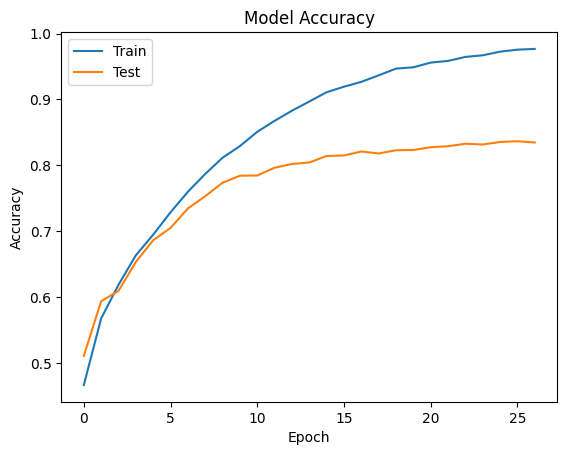

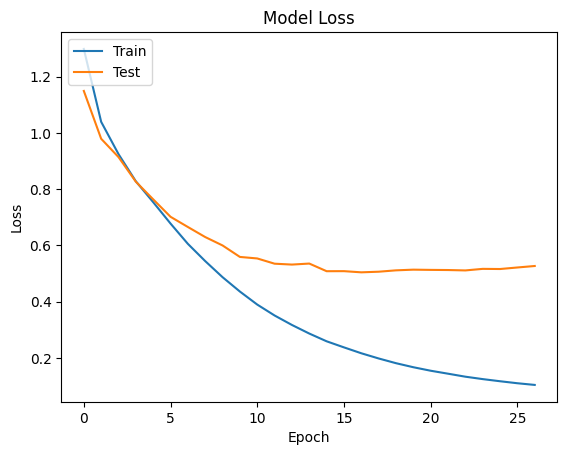

Test Accuracy: 83.472%
83/83 [==============================] - 1s 6ms/step


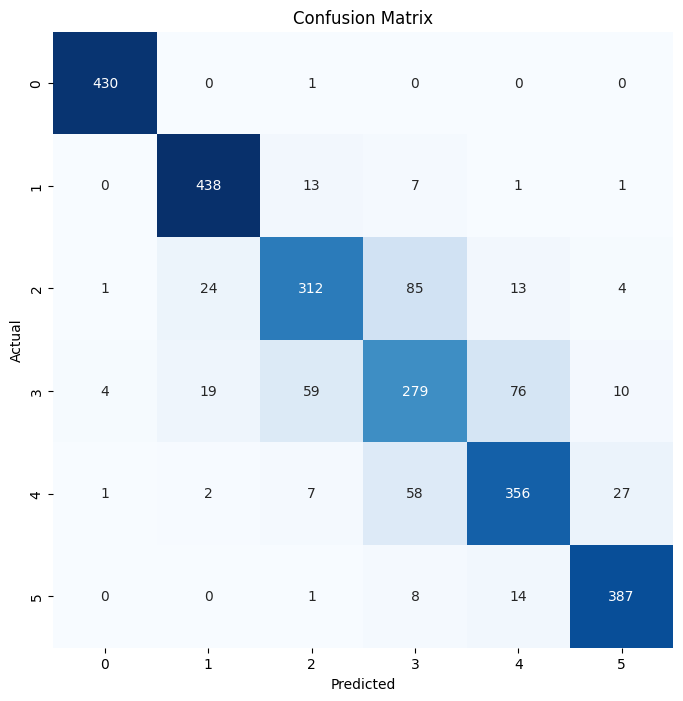

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       431
           1       0.91      0.95      0.93       460
           2       0.79      0.71      0.75       439
           3       0.64      0.62      0.63       447
           4       0.77      0.79      0.78       451
           5       0.90      0.94      0.92       410

    accuracy                           0.83      2638
   macro avg       0.83      0.84      0.83      2638
weighted avg       0.83      0.83      0.83      2638



In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense, GRU, Flatten, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv("C:\\Users\\prana\\Downloads\\winequality-white-resampled.csv")

# Preprocess the dataset
data['quality'] = pd.Categorical(data['quality'])
data['quality'] = data['quality'].cat.codes
y = data.pop('quality')
X = data

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Convert labels to one-hot encoding
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

# Model setup
inputs = Input(shape=(X_train.shape[1], 1))
gru = GRU(256, return_sequences=True)(inputs)
flat = Flatten()(gru)
outputs = Dense(y_train.shape[1], activation='Softmax')(flat)
model = Model(inputs=inputs, outputs=outputs)

model.summary()

# Training the model
def train_model(model, x_train, y_train, x_test, y_test, save_to, epochs):
    opt_adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    mc = ModelCheckpoint(f'{save_to}best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
    lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))

    model.compile(optimizer=opt_adam, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test), callbacks=[es, mc, lr_schedule])
    saved_model = load_model(f'{save_to}best_model.h5')
    return model, history

model, history = train_model(model, X_train, y_train, X_test, y_test, save_to='C:\\Users\\prana\\OneDrive\\Desktop\\', epochs=4000)

# Plotting training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluating the model
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

# Predictions and Metrics
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))
y_test_labels = y_test.idxmax(axis=1)
cm = confusion_matrix(y_test_labels, y_pred)
clr = classification_report(y_test_labels, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 11, 1)]           0         
                                                                 
 gru_5 (GRU)                 (None, 11, 256)           198912    
                                                                 
 dropout (Dropout)           (None, 11, 256)           0         
                                                                 
 batch_normalization (Batch  (None, 11, 256)           1024      
 Normalization)                                                  
                                                                 
 gru_6 (GRU)                 (None, 128)               148224    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                           

c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


330/330 [==============================] - ETA: 0s - loss: 1.2454 - accuracy: 0.4908
Epoch 2: val_accuracy improved from 0.37566 to 0.56596, saving model to C:\Users\prana\OneDrive\Desktop\best_model.h5
330/330 [==============================] - 12s 38ms/step - loss: 1.2454 - accuracy: 0.4908 - val_loss: 1.0773 - val_accuracy: 0.5660 - lr: 9.0484e-04
Epoch 3/4000
330/330 [==============================] - ETA: 0s - loss: 1.1291 - accuracy: 0.5325
Epoch 3: val_accuracy improved from 0.56596 to 0.58340, saving model to C:\Users\prana\OneDrive\Desktop\best_model.h5
330/330 [==============================] - 12s 36ms/step - loss: 1.1291 - accuracy: 0.5325 - val_loss: 0.9934 - val_accuracy: 0.5834 - lr: 8.1873e-04
Epoch 4/4000
330/330 [==============================] - ETA: 0s - loss: 1.0205 - accuracy: 0.5836
Epoch 4: val_accuracy improved from 0.58340 to 0.61107, saving model to C:\Users\prana\OneDrive\Desktop\best_model.h5
330/330 [==============================] - 16s 49ms/step - loss: 

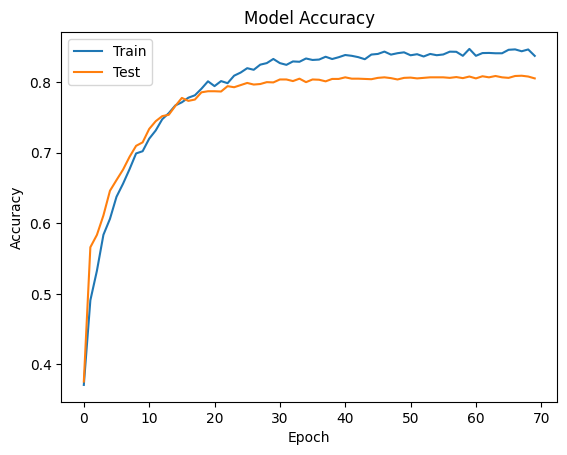

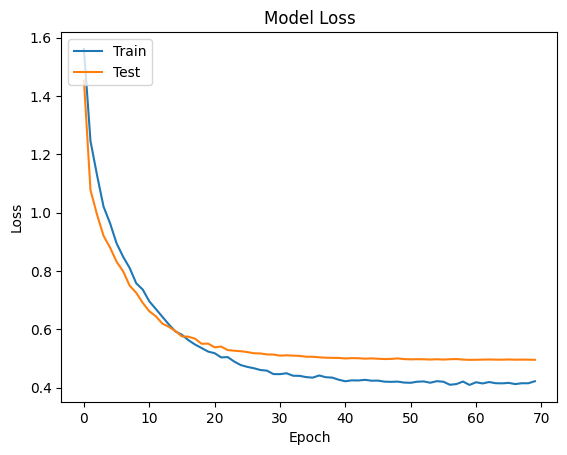

Test Accuracy: 80.516%
83/83 [==============================] - 2s 14ms/step


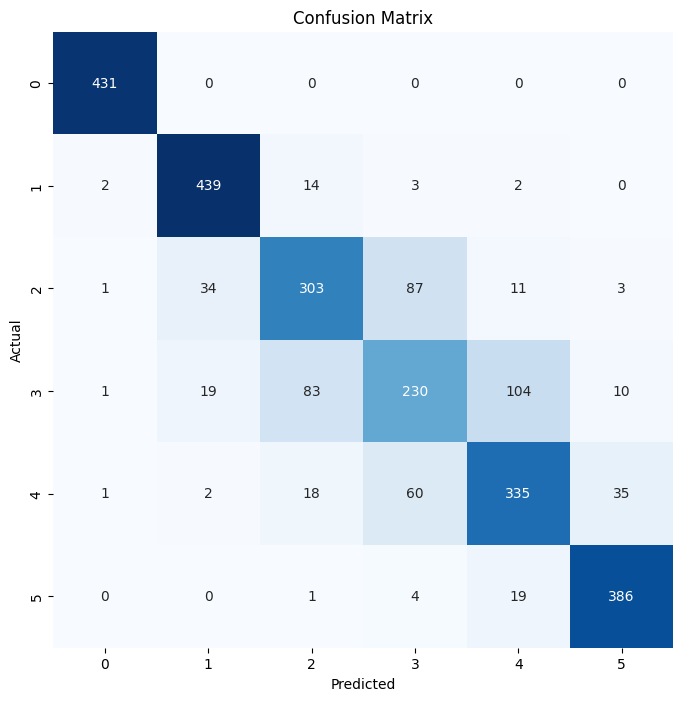

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       431
           1       0.89      0.95      0.92       460
           2       0.72      0.69      0.71       439
           3       0.60      0.51      0.55       447
           4       0.71      0.74      0.73       451
           5       0.89      0.94      0.91       410

    accuracy                           0.81      2638
   macro avg       0.80      0.81      0.80      2638
weighted avg       0.80      0.81      0.80      2638



In [6]:
# Model setup with additional layers and dropout
inputs = Input(shape=(X_train.shape[1], 1))

gru1 = GRU(256, return_sequences=True)(inputs)
dropout1 = tf.keras.layers.Dropout(0.2)(gru1)
batch_norm1 = tf.keras.layers.BatchNormalization()(dropout1)

gru2 = GRU(128, return_sequences=False)(batch_norm1)
dropout2 = tf.keras.layers.Dropout(0.2)(gru2)
batch_norm2 = tf.keras.layers.BatchNormalization()(dropout2)

outputs = Dense(y_train.shape[1], activation='softmax')(batch_norm2)
model = Model(inputs=inputs, outputs=outputs)

model.summary()

# Training the model
def train_model(model, x_train, y_train, x_test, y_test, save_to, epochs):
    opt_adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    mc = ModelCheckpoint(f'{save_to}best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
    lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))

    model.compile(optimizer=opt_adam, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test), callbacks=[es, mc, lr_schedule])
    saved_model = load_model(f'{save_to}best_model.h5')
    return model, history

model, history = train_model(model, X_train, y_train, X_test, y_test, save_to='C:\\Users\\prana\\OneDrive\\Desktop\\', epochs=4000)

# Plotting training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluating the model
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

# Predictions and Metrics
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))
y_test_labels = y_test.idxmax(axis=1)
cm = confusion_matrix(y_test_labels, y_pred)
clr = classification_report(y_test_labels, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 11, 1)]           0         
                                                                 
 gru_7 (GRU)                 (None, 11, 128)           50304     
                                                                 
 dropout_2 (Dropout)         (None, 11, 128)           0         
                                                                 
 batch_normalization_2 (Bat  (None, 11, 128)           512       
 chNormalization)                                                
                                                                 
 gru_8 (GRU)                 (None, 64)                37248     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                           

c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


165/165 [==============================] - ETA: 0s - loss: 1.5354 - accuracy: 0.3716
Epoch 2: val_accuracy improved from 0.23275 to 0.33965, saving model to C:\Users\prana\OneDrive\Desktop\best_model.h5
165/165 [==============================] - 6s 35ms/step - loss: 1.5354 - accuracy: 0.3716 - val_loss: 1.5689 - val_accuracy: 0.3397 - lr: 4.9010e-04
Epoch 3/4000
165/165 [==============================] - ETA: 0s - loss: 1.4461 - accuracy: 0.4079
Epoch 3: val_accuracy improved from 0.33965 to 0.42532, saving model to C:\Users\prana\OneDrive\Desktop\best_model.h5
165/165 [==============================] - 6s 38ms/step - loss: 1.4461 - accuracy: 0.4079 - val_loss: 1.3641 - val_accuracy: 0.4253 - lr: 4.8039e-04
Epoch 4/4000
165/165 [==============================] - ETA: 0s - loss: 1.3594 - accuracy: 0.4347
Epoch 4: val_accuracy improved from 0.42532 to 0.48901, saving model to C:\Users\prana\OneDrive\Desktop\best_model.h5
165/165 [==============================] - 6s 37ms/step - loss: 1.3

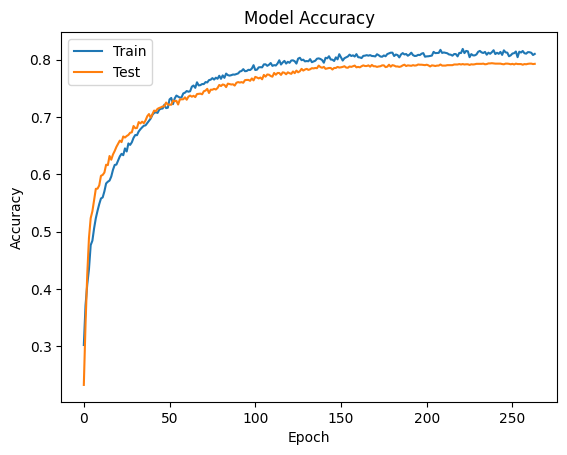

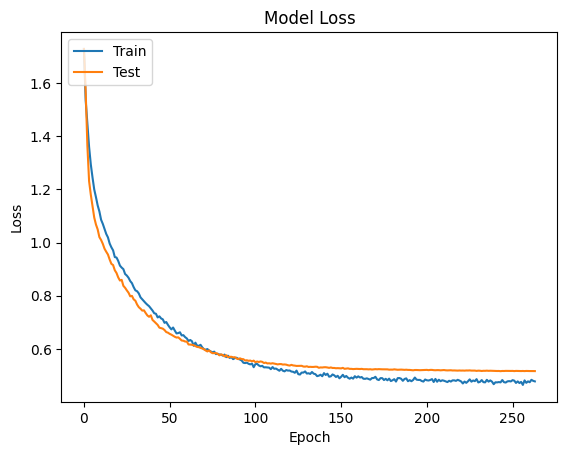

Test Accuracy: 79.265%
83/83 [==============================] - 1s 6ms/step


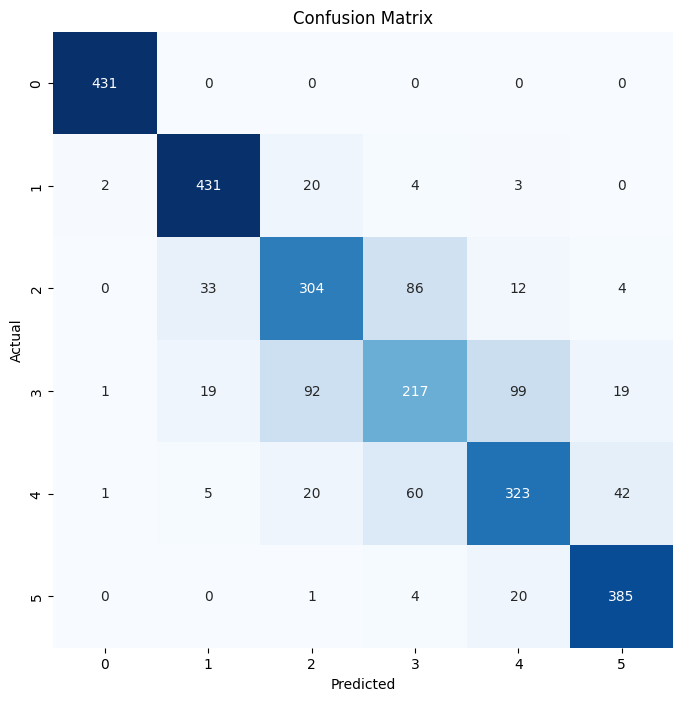

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       431
           1       0.88      0.94      0.91       460
           2       0.70      0.69      0.69       439
           3       0.58      0.49      0.53       447
           4       0.71      0.72      0.71       451
           5       0.86      0.94      0.90       410

    accuracy                           0.79      2638
   macro avg       0.79      0.80      0.79      2638
weighted avg       0.78      0.79      0.79      2638



In [7]:
# Model setup with adjustments
inputs = Input(shape=(X_train.shape[1], 1))

# First GRU layer with dropout and batch normalization
gru1 = GRU(128, return_sequences=True)(inputs)
dropout1 = tf.keras.layers.Dropout(0.2)(gru1)
batch_norm1 = tf.keras.layers.BatchNormalization()(dropout1)

# Second GRU layer with dropout and batch normalization
gru2 = GRU(64, return_sequences=False)(batch_norm1)
dropout2 = tf.keras.layers.Dropout(0.2)(gru2)
batch_norm2 = tf.keras.layers.BatchNormalization()(dropout2)

# Dense layer with softmax activation
outputs = Dense(y_train.shape[1], activation='softmax')(batch_norm2)
model = Model(inputs=inputs, outputs=outputs)

model.summary()

# Training the model
def train_model(model, x_train, y_train, x_test, y_test, save_to, epochs):
    opt_adam = tf.keras.optimizers.Adam(learning_rate=0.0005)
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
    mc = ModelCheckpoint(f'{save_to}best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
    lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.0005 * np.exp(-epoch / 50.))

    model.compile(optimizer=opt_adam, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, batch_size=64, epochs=epochs, validation_data=(x_test, y_test), callbacks=[es, mc, lr_schedule])
    saved_model = load_model(f'{save_to}best_model.h5')
    return model, history

model, history = train_model(model, X_train, y_train, X_test, y_test, save_to='C:\\Users\\prana\\OneDrive\\Desktop\\', epochs=4000)

# Plotting training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluating the model
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

# Predictions and Metrics
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))
y_test_labels = y_test.idxmax(axis=1)
cm = confusion_matrix(y_test_labels, y_pred)
clr = classification_report(y_test_labels, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 11, 1)]           0         
                                                                 
 gru_9 (GRU)                 (None, 64)                12864     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 6)                 390       
                                                                 
Total params: 13510 (52.77 KB)
Trainable params: 13382 (52.27 KB)
Non-trainable params: 128 (512.00 Byte)
___________________

c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


328/330 [============================>.] - ETA: 0s - loss: 1.5133 - accuracy: 0.3694
Epoch 2: val_accuracy improved from 0.36505 to 0.41812, saving model to C:\Users\prana\OneDrive\Desktop\best_model.h5
330/330 [==============================] - 5s 14ms/step - loss: 1.5133 - accuracy: 0.3690 - val_loss: 1.4149 - val_accuracy: 0.4181 - lr: 9.5123e-04
Epoch 3/1000
328/330 [============================>.] - ETA: 0s - loss: 1.4247 - accuracy: 0.4074
Epoch 3: val_accuracy improved from 0.41812 to 0.42267, saving model to C:\Users\prana\OneDrive\Desktop\best_model.h5
330/330 [==============================] - 5s 14ms/step - loss: 1.4247 - accuracy: 0.4076 - val_loss: 1.3637 - val_accuracy: 0.4227 - lr: 9.0484e-04
Epoch 4/1000
328/330 [============================>.] - ETA: 0s - loss: 1.3789 - accuracy: 0.4271
Epoch 4: val_accuracy improved from 0.42267 to 0.44541, saving model to C:\Users\prana\OneDrive\Desktop\best_model.h5
330/330 [==============================] - 4s 13ms/step - loss: 1.3

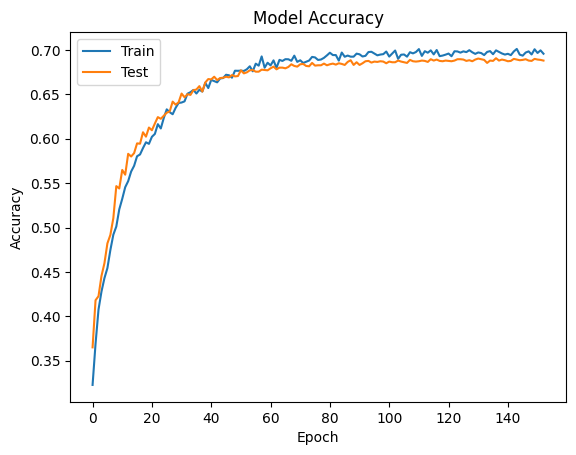

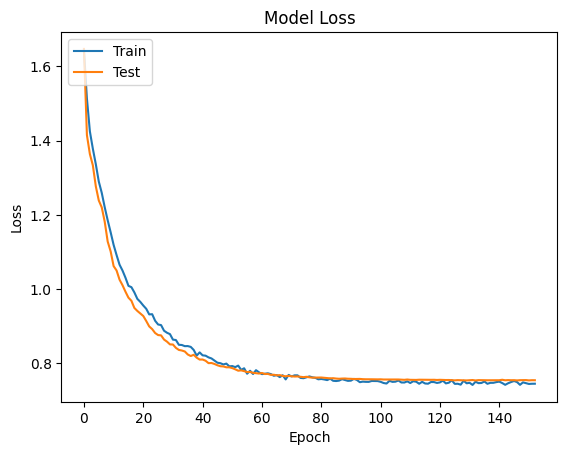

Test Accuracy: 68.802%
83/83 [==============================] - 1s 5ms/step


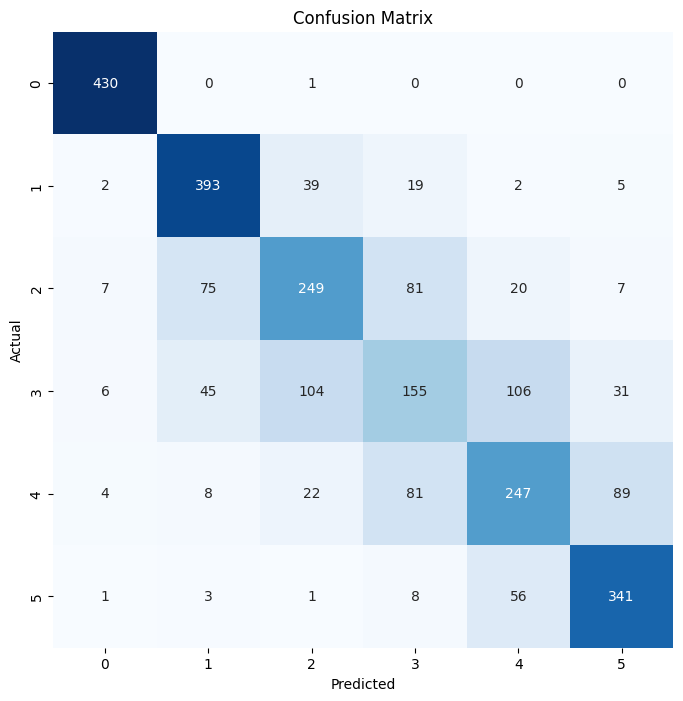

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       431
           1       0.75      0.85      0.80       460
           2       0.60      0.57      0.58       439
           3       0.45      0.35      0.39       447
           4       0.57      0.55      0.56       451
           5       0.72      0.83      0.77       410

    accuracy                           0.69      2638
   macro avg       0.67      0.69      0.68      2638
weighted avg       0.67      0.69      0.68      2638



In [8]:
# Simplified model setup with adjustments
inputs = Input(shape=(X_train.shape[1], 1))

# Single GRU layer with dropout and batch normalization
gru = GRU(64, return_sequences=False)(inputs)
dropout = tf.keras.layers.Dropout(0.2)(gru)
batch_norm = tf.keras.layers.BatchNormalization()(dropout)

# Dense layer with softmax activation
outputs = Dense(y_train.shape[1], activation='softmax')(batch_norm)
model = Model(inputs=inputs, outputs=outputs)

model.summary()

# Training the model
def train_model(model, x_train, y_train, x_test, y_test, save_to, epochs):
    opt_adam = tf.keras.optimizers.Adam(learning_rate=0.001)
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
    mc = ModelCheckpoint(f'{save_to}best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
    lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 20.))

    model.compile(optimizer=opt_adam, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test), callbacks=[es, mc, lr_schedule])
    saved_model = load_model(f'{save_to}best_model.h5')
    return model, history

model, history = train_model(model, X_train, y_train, X_test, y_test, save_to='C:\\Users\\prana\\OneDrive\\Desktop\\', epochs=1000)

# Plotting training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluating the model
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

# Predictions and Metrics
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))
y_test_labels = y_test.idxmax(axis=1)
cm = confusion_matrix(y_test_labels, y_pred)
clr = classification_report(y_test_labels, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:\\Users\\prana\\OneDrive\\Desktop\\SEM-2\\IMI_PROJ\\winequality-white.csv"
wine_data = pd.read_csv(file_path)

# Separate features and target
X = wine_data.drop(columns='quality')
y = wine_data['quality']
y=y-3
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the XGBoost Classifier
xgb = XGBClassifier(random_state=42, n_estimators=1000)
xgb.fit(X_train, y_train)

# Get leaf indices for each sample
train_leaves = xgb.apply(X_train)
test_leaves = xgb.apply(X_test)

# Combine the original features with the leaf indices
X_train_combined = np.hstack([X_train, train_leaves])
X_test_combined = np.hstack([X_test, test_leaves])

# Standardize the features
scaler = StandardScaler()
X_train_combined = scaler.fit_transform(X_train_combined)
X_test_combined = scaler.transform(X_test_combined)


In [6]:
# Convert labels to categorical format
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Define the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_combined.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_combined, y_train_categorical, epochs=500, batch_size=32, validation_split=0.2, verbose=2)


Epoch 1/500
264/264 - 5s - loss: 2.4583 - accuracy: 0.3704 - val_loss: 1.1205 - val_accuracy: 0.6062 - 5s/epoch - 19ms/step
Epoch 2/500
264/264 - 3s - loss: 1.3403 - accuracy: 0.4713 - val_loss: 0.9566 - val_accuracy: 0.6659 - 3s/epoch - 11ms/step
Epoch 3/500
264/264 - 3s - loss: 1.1028 - accuracy: 0.5477 - val_loss: 0.8543 - val_accuracy: 0.6829 - 3s/epoch - 10ms/step
Epoch 4/500
264/264 - 3s - loss: 1.0307 - accuracy: 0.5786 - val_loss: 0.8217 - val_accuracy: 0.6725 - 3s/epoch - 11ms/step
Epoch 5/500
264/264 - 3s - loss: 0.9470 - accuracy: 0.6039 - val_loss: 0.7568 - val_accuracy: 0.7128 - 3s/epoch - 11ms/step
Epoch 6/500
264/264 - 3s - loss: 0.8901 - accuracy: 0.6315 - val_loss: 0.7219 - val_accuracy: 0.7289 - 3s/epoch - 11ms/step
Epoch 7/500
264/264 - 3s - loss: 0.8356 - accuracy: 0.6482 - val_loss: 0.6898 - val_accuracy: 0.7242 - 3s/epoch - 11ms/step
Epoch 8/500
264/264 - 3s - loss: 0.7941 - accuracy: 0.6731 - val_loss: 0.6340 - val_accuracy: 0.7555 - 3s/epoch - 11ms/step
Epoch 9/

83/83 [==============================] - 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       431
           1       0.94      0.95      0.94       460
           2       0.68      0.79      0.73       439
           3       0.71      0.63      0.67       447
           4       0.84      0.80      0.82       451
           5       0.95      0.94      0.95       410

    accuracy                           0.85      2638
   macro avg       0.85      0.85      0.85      2638
weighted avg       0.85      0.85      0.85      2638



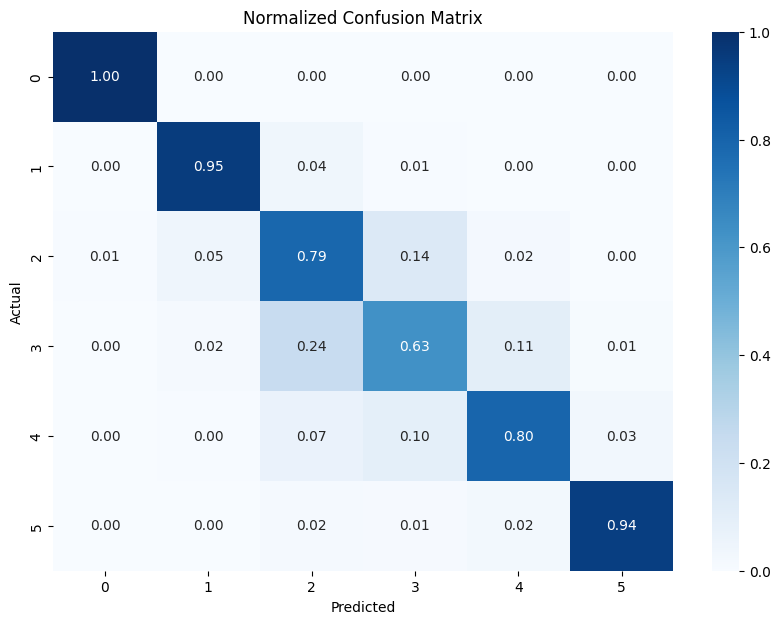

In [7]:
# Predict on the test set
y_pred_prob = model.predict(X_test_combined)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')

# Display classification report
print("Classification Report:\n", class_report)

# Display normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=xgb.classes_, yticklabels=xgb.classes_)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = 'C:\\Users\\prana\\OneDrive\\Desktop\\SEM-2\\IMI_PROJ\\winequality-white.csv'
df = pd.read_csv(file_path)

# Check for missing values
print(df.isnull().sum())

# Split the data into features and target
X = df.drop('quality', axis=1)
y = df['quality']
y=y-3
# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize models
xgb = XGBClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Fit models
xgb.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Generate predictions
xgb_preds = xgb.predict_proba(X_train)[:, 1]
rf_preds = rf.predict_proba(X_train)[:, 1]

# Create new dataset for the second-level model
stack_train = pd.DataFrame({'xgb': xgb_preds, 'rf': rf_preds})

# Initialize the second-level model
stack_model = LogisticRegression(random_state=42)

# Fit the second-level model
stack_model.fit(stack_train, y_train)

# Generate predictions for the test set
xgb_test_preds = xgb.predict_proba(X_test)[:, 1]
rf_test_preds = rf.predict_proba(X_test)[:, 1]

# Create new dataset for the second-level model
stack_test = pd.DataFrame({'xgb': xgb_test_preds, 'rf': rf_test_preds})

# Predict with the stacking model
final_preds = stack_model.predict(stack_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, final_preds))
print("Classification Report:\n", classification_report(y_test, final_preds))


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Accuracy: 0.4291129643669447
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       431
           1       0.95      0.97      0.96       460
           2       0.38      0.61      0.47       439
           3       0.26      0.11      0.16       447
           4       0.00      0.00      0.00       451
           5       0.29      0.91      0.44       410

    accuracy                           0.43      2638
   macro avg       0.31      0.43      0.34      2638
weighted avg       0.32      0.43      0.34      2638



In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Load the dataset
file_path = 'C:\\Users\\prana\\OneDrive\\Desktop\\SEM-2\\IMI_PROJ\\winequality-white.csv'
df = pd.read_csv(file_path)

# Check for missing values
print(df.isnull().sum())

# Split the data into features and target
X = df.drop('quality', axis=1)
y = df['quality']
y=y-3
# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=5)  # Choose the number of components
X_scaled = pca.fit_transform(X_scaled)

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [500, 2000],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize the XGBoost classifier
xgb = XGBClassifier(random_state=42)

# Perform Grid Search for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
xgb_grid_search.fit(X_train, y_train)

# Best parameters for XGBoost
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
best_xgb = xgb_grid_search.best_estimator_

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [1000, 2000],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search for Random Forest
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

# Best parameters for Random Forest
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
best_rf = rf_grid_search.best_estimator_

# Fit models with best parameters
best_xgb.fit(X_train, y_train)
best_rf.fit(X_train, y_train)

# Generate predictions
xgb_preds = best_xgb.predict_proba(X_train)[:, 1]
rf_preds = best_rf.predict_proba(X_train)[:, 1]

# Create new dataset for the second-level model
stack_train = pd.DataFrame({'xgb': xgb_preds, 'rf': rf_preds})

# Define the base models
estimators = [
    ('xgb', best_xgb),
    ('rf', best_rf)
]

# Initialize the Stacking Classifier with Logistic Regression as the final estimator
stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=42))

# Fit the Stacking Classifier
stack_model.fit(X_train, y_train)

# Generate predictions for the test set
final_preds = stack_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, final_preds))
print("Classification Report:\n", classification_report(y_test, final_preds))


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Fitting 3 folds for each of 162 candidates, totalling 486 fits


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Classification Report for Linear Regression:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.40      0.67      0.50         3
           5       0.38      0.60      0.46         5
           6       0.43      0.60      0.50         5
           7       0.25      0.33      0.29         3
           8       0.00      0.00      0.00         3

    accuracy                           0.38        24
   macro avg       0.24      0.37      0.29        24
weighted avg       0.25      0.38      0.30        24



c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

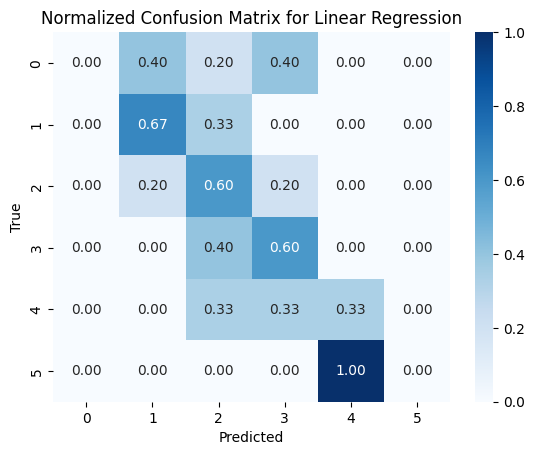

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           3       0.33      0.40      0.36         5
           4       0.00      0.00      0.00         3
           5       1.00      0.20      0.33         5
           6       0.22      0.40      0.29         5
           7       0.20      0.33      0.25         3
           8       0.50      0.33      0.40         3

    accuracy                           0.29        24
   macro avg       0.38      0.28      0.27        24
weighted avg       0.41      0.29      0.29        24



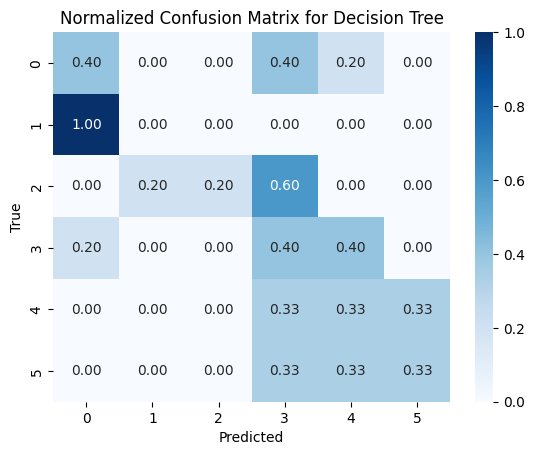

Classification Report for Random Forest:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.75      1.00      0.86         3
           5       0.50      0.80      0.62         5
           6       0.57      0.80      0.67         5
           7       0.20      0.33      0.25         3
           8       0.00      0.00      0.00         3

    accuracy                           0.50        24
   macro avg       0.34      0.49      0.40        24
weighted avg       0.34      0.50      0.41        24



c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

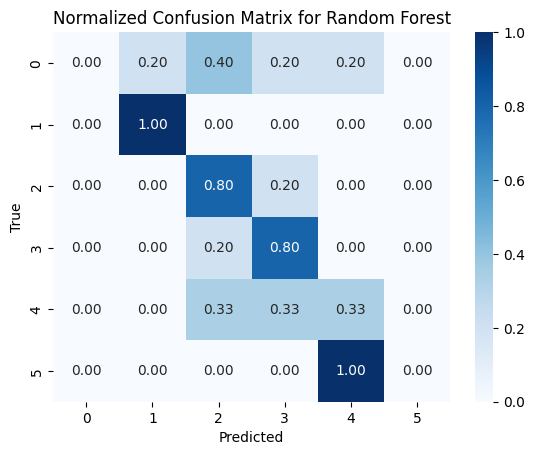

Classification Report for Best Decision Tree:

              precision    recall  f1-score   support

           3       0.40      0.40      0.40         5
           4       0.50      0.33      0.40         3
           5       0.75      0.60      0.67         5
           6       0.00      0.00      0.00         5
           7       0.09      0.33      0.14         3
           8       0.00      0.00      0.00         3

    accuracy                           0.29        24
   macro avg       0.29      0.28      0.27        24
weighted avg       0.31      0.29      0.29        24



c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

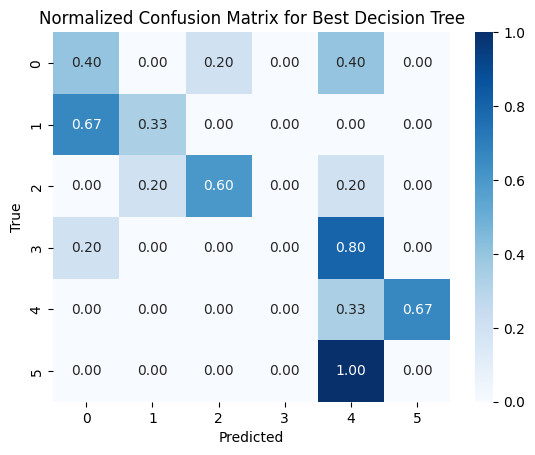

Classification Report for Best Random Forest:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.75      1.00      0.86         3
           5       0.44      0.80      0.57         5
           6       0.80      0.80      0.80         5
           7       0.33      0.67      0.44         3
           8       0.00      0.00      0.00         3

    accuracy                           0.54        24
   macro avg       0.39      0.54      0.45        24
weighted avg       0.39      0.54      0.45        24



c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

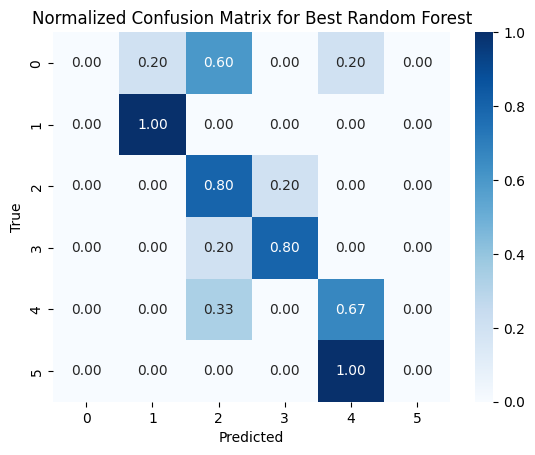

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:\\Users\\prana\\OneDrive\\Desktop\\SEM-2\\IMI_PROJ\\winequality-white.csv'
data = pd.read_csv(file_path)

# Balance the dataset
min_class_size = data['quality'].value_counts().min()
balanced_data = data.groupby('quality').apply(lambda x: x.sample(min_class_size)).reset_index(drop=True)

# Split the data into features and target
X = balanced_data.drop('quality', axis=1)
y = balanced_data['quality']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Hyperparameter tuning for Decision Tree and Random Forest
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [500, 1000, 2000],
    'max_depth': [None, 100, 200, 300],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearch for Decision Tree
grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)
best_dt = grid_search_dt.best_estimator_

# GridSearch for Random Forest
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

# Update models dictionary with the best estimators
models["Best Decision Tree"] = best_dt
models["Best Random Forest"] = best_rf

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rounded_predictions = np.round(predictions).astype(int)
    
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, rounded_predictions))
    
    conf_matrix = confusion_matrix(y_test, rounded_predictions, normalize='true')
    sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues')
    plt.title(f'Normalized Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Classification Report for Linear Regression:

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         4
           4       0.10      0.24      0.15        41
           5       0.44      0.50      0.47       311
           6       0.50      0.47      0.48       420
           7       0.48      0.34      0.40       167
           8       0.25      0.06      0.09        36

    accuracy                           0.43       979
   macro avg       0.25      0.23      0.23       979
weighted avg       0.45      0.43      0.43       979



c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

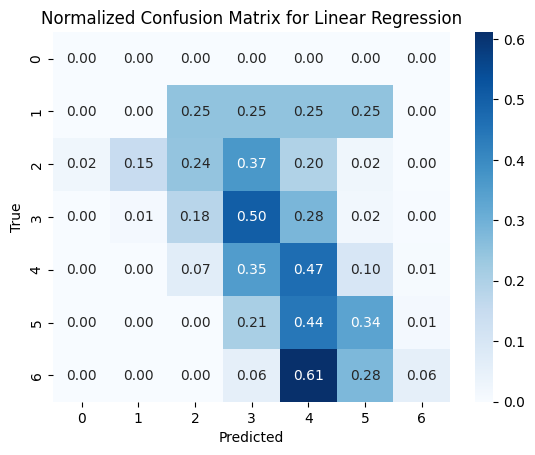

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           3       0.22      0.50      0.31         4
           4       0.17      0.29      0.22        41
           5       0.67      0.62      0.64       311
           6       0.67      0.57      0.61       420
           7       0.45      0.54      0.49       167
           8       0.32      0.50      0.39        36

    accuracy                           0.56       979
   macro avg       0.42      0.50      0.44       979
weighted avg       0.60      0.56      0.58       979



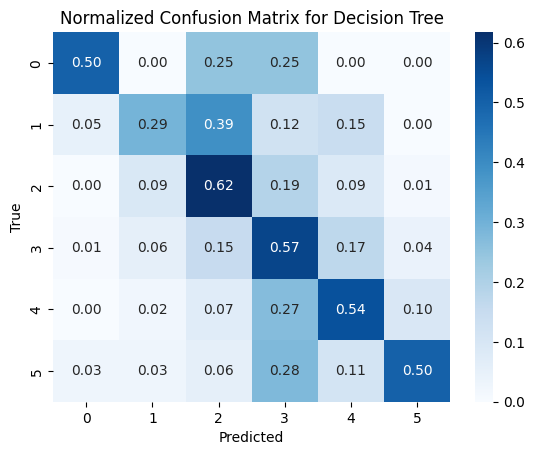

Classification Report for Random Forest:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.35      0.29      0.32        41
           5       0.68      0.71      0.70       311
           6       0.71      0.69      0.70       420
           7       0.62      0.71      0.66       167
           8       0.65      0.36      0.46        36

    accuracy                           0.67       979
   macro avg       0.50      0.46      0.47       979
weighted avg       0.67      0.67      0.67       979



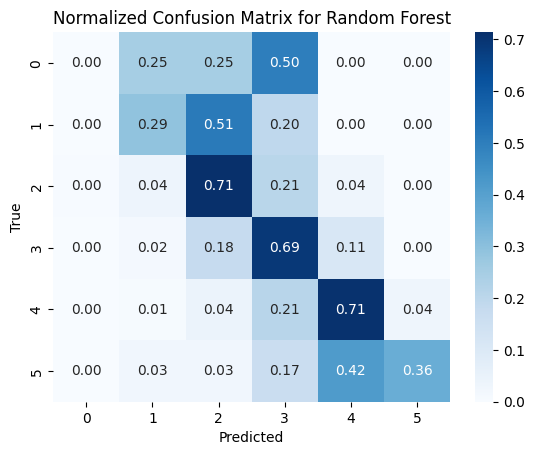

Classification Report for Best Decision Tree:

              precision    recall  f1-score   support

           3       0.22      0.50      0.31         4
           4       0.17      0.29      0.22        41
           5       0.67      0.62      0.64       311
           6       0.67      0.57      0.61       420
           7       0.45      0.54      0.49       167
           8       0.32      0.50      0.39        36

    accuracy                           0.56       979
   macro avg       0.42      0.50      0.44       979
weighted avg       0.60      0.56      0.58       979



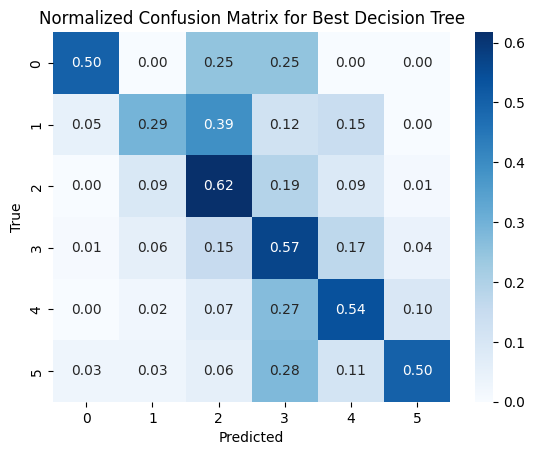

Classification Report for Best Random Forest:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.38      0.27      0.31        41
           5       0.66      0.72      0.69       311
           6       0.71      0.67      0.69       420
           7       0.61      0.71      0.66       167
           8       0.65      0.36      0.46        36

    accuracy                           0.66       979
   macro avg       0.50      0.46      0.47       979
weighted avg       0.66      0.66      0.66       979



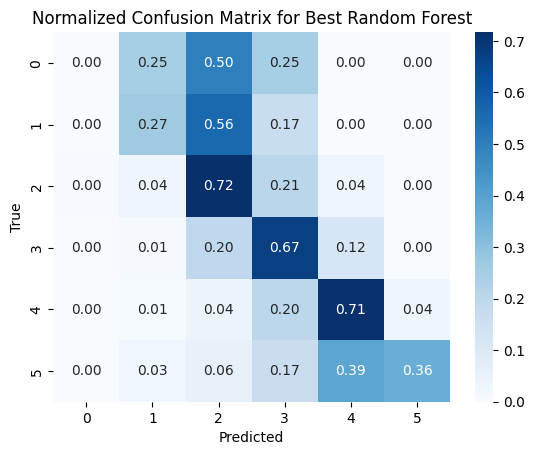

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:\\Users\\prana\\OneDrive\\Desktop\\SEM-2\\IMI_PROJ\\winequality-white.csv'
data = pd.read_csv(file_path)

# Split the data into features and target
X = data.drop('quality', axis=1)
y = data['quality']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Hyperparameter tuning for Decision Tree and Random Forest
param_grid_dt = {
    'max_depth': [1000, 100, 200, 300, 400],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [500, 1000, 200],
    'max_depth': [1000, 100, 200, 300],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearch for Decision Tree
grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train_balanced, y_train_balanced)
best_dt = grid_search_dt.best_estimator_

# GridSearch for Random Forest
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train_balanced, y_train_balanced)
best_rf = grid_search_rf.best_estimator_

# Update models dictionary with the best estimators
models["Best Decision Tree"] = best_dt
models["Best Random Forest"] = best_rf

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    predictions = model.predict(X_test)
    rounded_predictions = np.round(predictions).astype(int)
    
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, rounded_predictions))
    
    conf_matrix = confusion_matrix(y_test, rounded_predictions, normalize='true')
    sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues')
    plt.title(f'Normalized Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.s


Classification Report for Linear Regression:

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         4
           4       0.16      0.07      0.10        41
           5       0.53      0.33      0.41       311
           6       0.45      0.50      0.48       420
           7       0.33      0.54      0.41       167
           8       0.22      0.11      0.15        36
           9       0.00      0.00      0.00         0

    accuracy                           0.42       979
   macro avg       0.21      0.20      0.19       979
weighted avg       0.43      0.42      0.41       979



c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

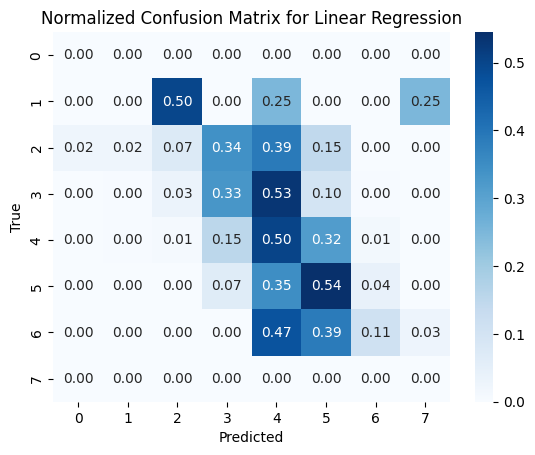

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.26      0.34      0.29        41
           5       0.66      0.49      0.56       311
           6       0.60      0.55      0.58       420
           7       0.45      0.55      0.49       167
           8       0.18      0.42      0.25        36

    accuracy                           0.52       979
   macro avg       0.36      0.39      0.36       979
weighted avg       0.56      0.52      0.53       979



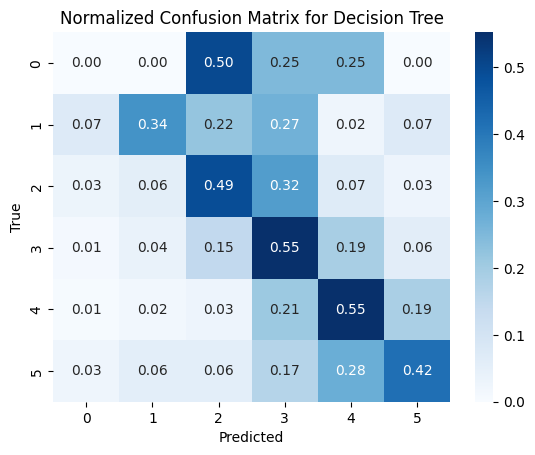

Classification Report for Random Forest:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.40      0.10      0.16        41
           5       0.59      0.23      0.34       311
           6       0.45      0.47      0.46       420
           7       0.35      0.71      0.47       167
           8       0.26      0.47      0.34        36

    accuracy                           0.42       979
   macro avg       0.34      0.33      0.29       979
weighted avg       0.46      0.42      0.40       979



c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

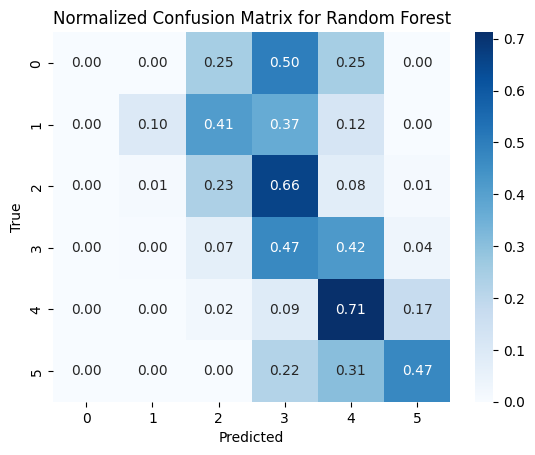

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:\\Users\\prana\\OneDrive\\Desktop\\SEM-2\\IMI_PROJ\\winequality-white.csv'
data = pd.read_csv(file_path)

# Split the data into features and target
X = data.drop('quality', axis=1)
y = data['quality']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=8)  # Choose the number of components
X_scaled = pca.fit_transform(X_scaled)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Define regression models with specified parameters
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=200, min_samples_split=5, min_samples_leaf=2),
    "Random Forest": RandomForestRegressor(random_state=5, n_estimators=2000, max_depth=2000, min_samples_split=10, min_samples_leaf=4)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    predictions = model.predict(X_test)
    rounded_predictions = np.ceil(predictions).astype(int)
    
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, rounded_predictions))
    
    conf_matrix = confusion_matrix(y_test, rounded_predictions, normalize='true')
    sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues')
    plt.title(f'Normalized Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
